# Assignment 2: 
### Set up the work for data-driven inference based on CitiBike data

1. States the question you want to ask, and formulates the Null and Alternative hypothesis

__________

## Q:

Is the percentage of women rides at midnight from total women rides significantly lower than men's midnight rides percentage?

## Null Hypothesis

The percentage of women rides at midnight from total women rides is similar to or greater than men's rides percentage from total men's rides at the same hour?

$H_0$ : $\frac{W{\mathrm{midnight}}}{W{\mathrm{rides}}} => \frac{M{\mathrm{midnight}}}{M{\mathrm{rides}}}$

## Alternative Hypothesis

The percentage of women rides at midnight from total women rides is significantly smaller than men's rides percentage from total men's rides at the same hour?
_significance level_ $\alpha = 0.05$

$H_1$ : $\frac{W{\mathrm{midnight}}}{W{\mathrm{rides}}} < \frac{M{\mathrm{midnight}}}{M{\mathrm{rides}}}$

________

Use pandas to read in the CitiBike files, either from the DF, or locally, but you must be able to download them on the spot (so the TA can reproduce your work). 

In [1]:
from __future__ import print_function

import numpy as np
import pylab as pl
import pandas as pd
import os

import seaborn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv("/gws/open/Student/citibike/201706-citibike-tripdata.csv.zip")

3. Display the top few rows of the DF in your notebook. This table __must be rendered__.
5. Display the reducted dataframe. This table __must be rendered__.
6. Plot your data distributions.

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


In [4]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df['date'] = pd.to_datetime(df['starttime'])

In [5]:
df['hour'] = df['date'].dt.hour

In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1,2017-06-01 00:00:02,0
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1,2017-06-01 00:00:13,0
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1,2017-06-01 00:00:20,0
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2,2017-06-01 00:00:24,0
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1,2017-06-01 00:00:33,0


In [7]:
# CitiBike Gender data is displayed as follows:
# Unknown gender = 0
# Male = 1
# Female = 2

# extract the columns for the analysis
# I chose not to calculate unknown gender (value = 0) in this analysis
df2 = df[['hour','gender']]

In [8]:
df2.head()

,hour,gender
0,0,1
1,0,1
2,0,1
3,0,2
4,0,1


In [9]:
w_total = df2.hour.groupby([df.gender == 2]).count()
m_total = df2.hour.groupby([df.gender == 1]).count()

w_total = w_total[True]
m_total = m_total[True]

print(w_total)
print(m_total)

401253
1131930


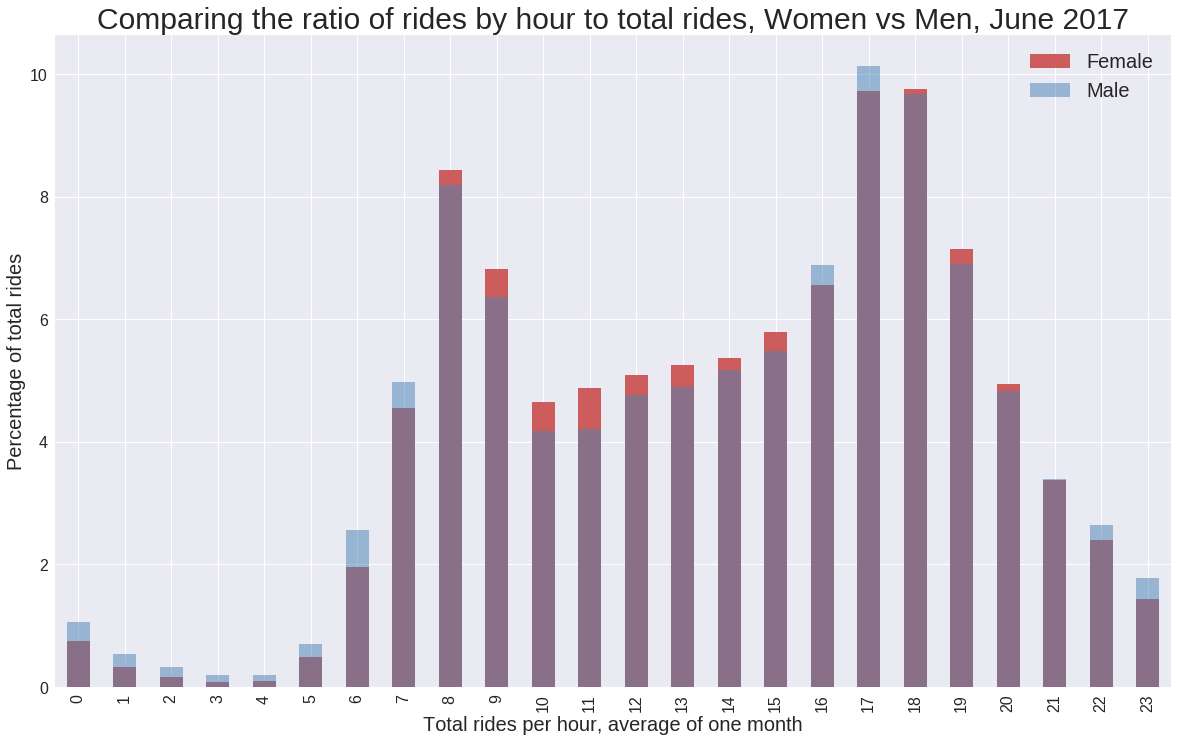

In [10]:
fig = pl.figure(figsize(20,12))

(((df2['hour'][df2['gender'] == 2].groupby([df2['hour']]).count()) / w_total)*100)\
.plot(kind="bar", color='IndianRed', label='Female')
ax = (((df2['hour'][df2['gender'] == 1].groupby([df2['hour']]).count()) / m_total)*100)\
.plot(kind="bar", color='SteelBlue', alpha=0.5, label='Male', fontsize=16)

pl.xlabel('Total rides per hour, average of one month', fontsize=20)
pl.ylabel('Percentage of total rides', fontsize=20)
pl.title('Comparing the ratio of rides by hour to total rides, Women vs Men, June 2017', fontsize=30)
pl.legend(prop={'size': 20})

### Fig.1: Comparing the ratio of rides by hour to total rides, Women vs Men, June 2017
Reviewing the above distribution and looking specifically on midnight (hour = 0), it is obvious that the % of men rides at midnight from total men rides is higher than the % of women rides at midnight from total women rides over the analyzed mounth. Thus we can _reject the Null Hypothesis_.

___

#### Implementing [Charley's HW3 review](https://github.com/charlie-moffett/PUI2017_cm4698/blob/master/HW4_cm4698/CitibikeReview_rxl204.md) - Daytime vs Nighttime rides instead of only Midnight >>
### Analyzing Daytime rides (7am to 8pm) and Nighttime rides (8pm-7am) over the same month (_*this part had been added to HW7_): 
The new **Null hypothesis**:

The percentage of women rides during nighttime from total women rides is similar to or greater than men's rides percentage from total men's rides at the same timeframe

$H_0$ : $\frac{W{\mathrm{nighttime}}}{W{\mathrm{rides}}} => \frac{M{\mathrm{nighttime}}}{M{\mathrm{rides}}}$

The new **Alternative hypothesis**:

The percentage of women rides during nighttime from total women rides is significantly smaller than men's rides percentage from total men's rides at the same timeframe
_significance level_ $\alpha = 0.05$

$H_1$ : $\frac{W{\mathrm{nighttime}}}{W{\mathrm{rides}}} < \frac{M{\mathrm{nighttime}}}{M{\mathrm{rides}}}$

In [11]:
# (1) adding DayOrNight column

# creating a function to define daytime / nighttime trip
def day_or_night(hour):
    if hour >= 7 and hour < 20:
        return 1
    else:
        return 0

df2['DayOrNight'] = df['hour'].apply(day_or_night)
df2 = df2.dropna(0)
df2.tail()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,hour,gender,DayOrNight
1731589,23,2,0
1731590,23,1,0
1731591,23,1,0
1731592,23,1,0
1731593,23,2,0


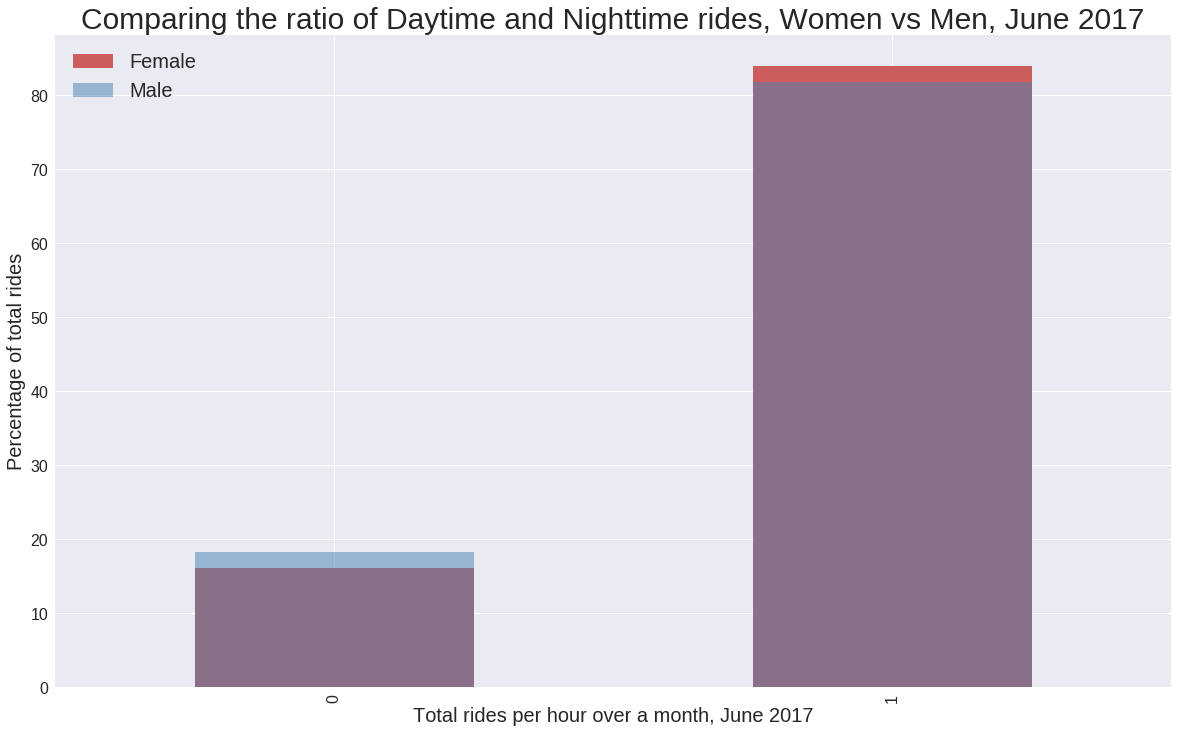

In [12]:
fig = pl.figure(figsize(20,12))

(((df2['DayOrNight'][df2['gender'] == 2].groupby([df2['DayOrNight']]).count()) / w_total)*100)\
.plot(kind="bar", color='IndianRed', label='Female')
ax1 = (((df2['DayOrNight'][df2['gender'] == 1].groupby([df2['DayOrNight']]).count()) / m_total)*100)\
.plot(kind="bar", color='SteelBlue', alpha=0.5, label='Male', fontsize=16)


pl.xlabel('Total rides per hour over a month, June 2017', fontsize=20)
pl.ylabel('Percentage of total rides', fontsize=20)
pl.title('Comparing the ratio of Daytime and Nighttime rides, Women vs Men, June 2017', fontsize=30)
pl.legend(prop={'size': 20})

### Fig.2: Comparing the ratio of Daytime and Nighttime rides, Women vs Men, June 2017
Reviewing the above distribution it is obvious that the % of men rides during nighttime from total men rides is higher than the % of women rides during nighttime from total women rides over the analyzed mounth. Thus we can _reject the #2 Null Hypothesis_.

___

#### Implementing [Dana's HW3 review](https://github.com/danachermesh/PUI2017_dcr346/blob/master/HW3_dcr346/CitibikeReview_bc1561.md) - Add more months to the original analysis >>
### Analyzing Midnight rides habbits men vs women over 6 months (_*this part had been added to HW7_): 
Adding 5 more months (Jan-June 2017) to our analysis to recheck and strenghten our results

In [13]:
# Jan 2017
df201701 = pd.read_csv("/gws/open/Student/citibike/201701-citibike-tripdata.csv.zip")
df201701.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [14]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df201701['date'] = pd.to_datetime(df201701['Start Time'])

In [15]:
df201701['hour'] = df201701['date'].dt.hour

In [16]:
df201701_1 = df201701[['hour','Gender']]
df201701_1.columns = ['hour','gender']
df201701_1.head()

,hour,gender
0,0,2
1,0,2
2,0,0
3,0,0
4,0,0


In [17]:
# Feb 2017
df201702 = pd.read_csv("/gws/open/Student/citibike/201702-citibike-tripdata.csv.zip")
df201702.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1087,2017-02-01 00:00:13,2017-02-01 00:18:20,345,W 13 St & 6 Ave,40.736494,-73.997044,305,E 58 St & 3 Ave,40.760958,-73.967245,17432,Subscriber,1966.0,1
1,704,2017-02-01 00:00:31,2017-02-01 00:12:15,3295,Central Park W & W 96 St,40.791270,-73.964839,2006,Central Park S & 6 Ave,40.765909,-73.976342,20621,Customer,NaN,0
2,212,2017-02-01 00:00:34,2017-02-01 00:04:06,336,Sullivan St & Washington Sq,40.730477,-73.999061,439,E 4 St & 2 Ave,40.726281,-73.989780,16826,Subscriber,1984.0,1
3,1140,2017-02-01 00:00:44,2017-02-01 00:19:44,484,W 44 St & 5 Ave,40.755003,-73.980144,3295,Central Park W & W 96 St,40.791270,-73.964839,27052,Subscriber,1980.0,1
4,320,2017-02-01 00:00:42,2017-02-01 00:06:02,490,8 Ave & W 33 St,40.751551,-73.993934,3431,E 35 St & 3 Ave,40.746524,-73.977885,25238,Subscriber,1987.0,1


In [18]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df201702['date'] = pd.to_datetime(df201702['Start Time'])

In [19]:
df201702['hour'] = df201702['date'].dt.hour

In [20]:
df201702_1 = df201702[['hour','Gender']]
df201702_1.columns = ['hour','gender']
df201702_1.head()

,hour,gender
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
# March 2017
df201703 = pd.read_csv("/gws/open/Student/citibike/201703-citibike-tripdata.csv.zip")
df201703.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2
1,223,2017-03-01 00:01:09,2017-03-01 00:04:53,127,Barrow St & Hudson St,40.731724,-74.006744,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19387,Subscriber,1985.0,2
2,1665,2017-03-01 00:01:27,2017-03-01 00:29:12,174,E 25 St & 1 Ave,40.738177,-73.977387,307,Canal St & Rutgers St,40.714275,-73.989900,15809,Subscriber,1988.0,1
3,100,2017-03-01 00:01:29,2017-03-01 00:03:10,316,Fulton St & William St,40.709560,-74.006536,306,Cliff St & Fulton St,40.708235,-74.005301,18956,Subscriber,1991.0,1
4,1229,2017-03-01 00:01:33,2017-03-01 00:22:02,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,25728,Subscriber,1963.0,1


In [22]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df201703['date'] = pd.to_datetime(df201703['Start Time'])

In [23]:
df201703['hour'] = df201703['date'].dt.hour

In [24]:
df201703_1 = df201703[['hour','Gender']]
df201703_1.columns = ['hour','gender']
df201703_1.head()

,hour,gender
0,0,2
1,0,2
2,0,1
3,0,1
4,0,1


In [25]:
# April 2017
df201704 = pd.read_csv("/gws/open/Student/citibike/201704-citibike-tripdata.csv.zip")
df201704.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2


In [26]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df201704['date'] = pd.to_datetime(df201704['starttime'])

In [27]:
df201704['hour'] = df201704['date'].dt.hour

In [28]:
df201704_1 = df201704[['hour','gender']]
df201704_1.head()

,hour,gender
0,0,1
1,0,1
2,0,1
3,0,1
4,0,2


In [29]:
# May 2017
df201705 = pd.read_csv("/gws/open/Student/citibike/201705-citibike-tripdata.csv.zip")
df201705.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,254,2017-05-01 00:00:13,2017-05-01 00:04:27,511,E 14 St & Avenue B,40.729387,-73.977724,394,E 9 St & Avenue C,40.725213,-73.977688,27695,Subscriber,1996.0,2
1,248,2017-05-01 00:00:19,2017-05-01 00:04:28,511,E 14 St & Avenue B,40.729387,-73.977724,394,E 9 St & Avenue C,40.725213,-73.977688,15869,Subscriber,1996.0,1
2,1120,2017-05-01 00:00:19,2017-05-01 00:19:00,242,Carlton Ave & Flushing Ave,40.697787,-73.973736,3083,Bushwick Ave & Powers St,40.712477,-73.941000,18700,Subscriber,1985.0,2
3,212,2017-05-01 00:00:24,2017-05-01 00:03:56,168,W 18 St & 6 Ave,40.739713,-73.994564,116,W 17 St & 8 Ave,40.741776,-74.001497,24981,Subscriber,1993.0,1
4,686,2017-05-01 00:00:29,2017-05-01 00:11:55,494,W 26 St & 8 Ave,40.747348,-73.997236,527,E 33 St & 2 Ave,40.744023,-73.976056,25407,Subscriber,1964.0,1


In [30]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df201705['date'] = pd.to_datetime(df201705['starttime'])

In [31]:
df201705['hour'] = df201705['date'].dt.hour

In [32]:
df201705_1 = df201705[['hour','gender']]
df201705_1.head()

,hour,gender
0,0,2
1,0,1
2,0,2
3,0,1
4,0,1


### Joining datasets of all 6 months

In [33]:
# returning June 2017 to include only hour and gender columns
df2017_6 = df2[['hour','gender']]
df2017_6.head()

,hour,gender
0,0,1
1,0,1
2,0,1
3,0,2
4,0,1


In [41]:
# appending datasets to a new dataframe
df3 = df201701_1.append(df201702_1)
df3 = df3.append(df201703_1)
df3 = df3.append(df201704_1)
df3 = df3.append(df201705_1)
df3 = df3.append(df2017_6)

# clear zeros
df3 = df3[df3['gender']>0]
df3

,hour,gender
0,0,2
1,0,2
5,0,1
6,0,1
7,0,2
8,0,1
9,0,1
10,0,1
11,0,1
12,0,1


In [42]:
w_total_all = df3.hour.groupby([df3.gender == 2]).count()
m_total_all = df3.hour.groupby([df3.gender == 1]).count()

w_total_all = w_total_all[True]
m_total_all = m_total_all[True]

print(w_total_all)
print(m_total_all)

1506643
4641506


In [45]:
fig = pl.figure(figsize(20,12))

(((df3['hour'][df3['gender'] == 2].groupby([df3['hour']])) / w_total_all)*100)\
.plot(kind="bar", color='IndianRed', label='Female')
ax = (((df3['hour'][df3['gender'] == 1].groupby([df2['hour']]).count()) / m_total_all)*100)\
.plot(kind="bar", color='SteelBlue', alpha=0.5, label='Male', fontsize=16)

pl.xlabel('Total rides per hour, average of six months', fontsize=20)
pl.ylabel('Percentage of total rides', fontsize=20)
pl.title('Comparing the ratio of rides by hour of total rides, Women vs Men, Jan-June 2017', fontsize=30)
pl.legend(prop={'size': 20})

ValueError: cannot reindex from a duplicate axis

### Results: 
 Reviewing the above distribution, we can reject the Null Hypothesis